In [ ]:
from desispec.io import read_spectra
from desitrip.preproc import rebin_flux, rescale_flux

from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

import os
import platform

In [ ]:
mpl.rc('font', size=14)


In [ ]:
def condition_spectra(coadd_files, truth_files, spect_files):
    """Read DESI spectra, rebin to a subsampled logarithmic wavelength grid, and rescale.
    
    Parameters
    ----------
    coadd_files : list or ndarray
        List of FITS files on disk with DESI spectra.
    truth_files : list or ndarray
        Truth files.
    
    Returns
    -------
    fluxes : ndarray
        Array of fluxes rebinned to a logarithmic wavelength grid.
    """
    fluxes_b = None
    fluxes_r = None
    fluxes_z = None
    
    for cf, tf, sf in zip(coadd_files, truth_files, spect_files):
        spectra = read_spectra(sf)
        wave = spectra.wave
        wave_b = wave['b']
        wave_r = wave['r']
        wave_z = wave['z']
        flux = spectra.flux
        flux_b = flux['b']
        flux_r = flux['r']
        flux_z = flux['z']
        ivar = spectra.ivar
        ivar_b = ivar['b']
        ivar_r = ivar['r']
        ivar_z = ivar['z']
        
        truth = Table.read(tf, 'TRUTH')
        truez = truth['TRUEZ']

#         # Pre-condition: remove spectra with NaNs and zero flux values.
#         mask = np.isnan(flux).any(axis=1) | (np.count_nonzero(flux, axis=1) == 0)
#         mask_idx = np.argwhere(mask)
#         flux = np.delete(flux, mask_idx, axis=0)
#         ivar = np.delete(ivar, mask_idx, axis=0)

        # Rebin and rescale fluxes so that each is normalized between 0 and 1.
        rewave_b, reflux_b, reivar_b = rebin_flux(wave_b, flux_b, ivar_b, truez, minwave=2500., maxwave=6000., nbins=150, log=True, clip=True)
        rsflux_b = rescale_flux(reflux_b)
        rewave_r, reflux_r, reivar_r = rebin_flux(wave_r, flux_r, ivar_r, truez, minwave=4000., maxwave=7800., nbins=150, log=True, clip=True)
        rsflux_r = rescale_flux(reflux_r)
        rewave_z, reflux_z, reivar_z = rebin_flux(wave_z, flux_z, ivar_z, truez, minwave=6800., maxwave=9500., nbins=150, log=True, clip=True)
        rsflux_z = rescale_flux(reflux_z)

        if fluxes_b is None:
            fluxes_b = rsflux_b
        else:
            fluxes_b = np.concatenate((fluxes_b, rsflux_b))
            
        if fluxes_r is None:
            fluxes_r = rsflux_r
        else:
            fluxes_r = np.concatenate((fluxes_r, rsflux_r))
            
        if fluxes_z is None:
            fluxes_z = rsflux_z
        else:
            fluxes_z = np.concatenate((fluxes_z, rsflux_z))
            
    flux = np.concatenate([fluxes_b,fluxes_r,fluxes_z],1)
    return flux

In [5]:
host_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/hosts/*truth.fits'))
host_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/hosts/*spect.fits'))
host_coadd = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/hosts/*coadd.fits'))
host_flux  = condition_spectra(host_coadd, host_truth, host_spectra)

/gpfs/fs1/home/awasserm/timedomain/desitrip/py/desitrip/preproc.py:162: RuntimeWarning: invalid value encountered in true_divide
  return (flux - a) / (b - a)


In [6]:
snia_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ia/hsiao/*truth.fits'))
snia_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ia/hsiao/*spect.fits'))
snia_files = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ia/hsiao/*coadd.fits'))
snia_flux  = condition_spectra(snia_files, snia_truth,snia_spectra)

In [7]:
# snib_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ib/*/*truth.fits'))
# snib_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ib/*/*spect.fits'))
# snib_files = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ib/*/*coadd.fits'))
# snib_flux  = condition_spectra(snib_files, snib_truth,snib_spectra)

In [8]:
# snic_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ic/*/*truth.fits'))
# snic_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ic/*/*spect.fits'))
# snic_files = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_ic/*/*coadd.fits'))
# snic_flux  = condition_spectra(snic_files, snic_truth,snic_spectra)

In [9]:
# sniin_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iin/*/*truth.fits'))
# sniin_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iin/*/*spect.fits'))
# sniin_files = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iin/*/*coadd.fits'))
# sniin_flux  = condition_spectra(sniin_files, sniin_truth,sniin_spectra)

In [10]:
sniip_truth = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iip/*/*truth.fits'))
sniip_spectra = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iip/*/*spect.fits'))
sniip_files = sorted(glob('/scratch/sbenzvi_lab/desi/time-domain/bgs/150s/sn_iip/*/*coadd.fits'))
sniip_flux  = condition_spectra(sniip_files, sniip_truth,sniip_spectra)

In [12]:
nhost, nbins  = host_flux.shape
nsnia, nbins  = snia_flux.shape
# nsnib, nbins  = snib_flux.shape
# nsnibc, nbins = snibc_flux.shape
# nsnic, nbins  = snic_flux.shape
# nsniin, nbins = sniin_flux.shape
# nsniilp, nbins = sniilp_flux.shape
nsniip, nbins = sniip_flux.shape
# nhost, nsnia, nsnib, nsnibc, nsnic, nsniin, nsniilp, nsniip, nbins
nhost, nsnia, nsniip, nbins

(9969, 9964, 9962, 450)

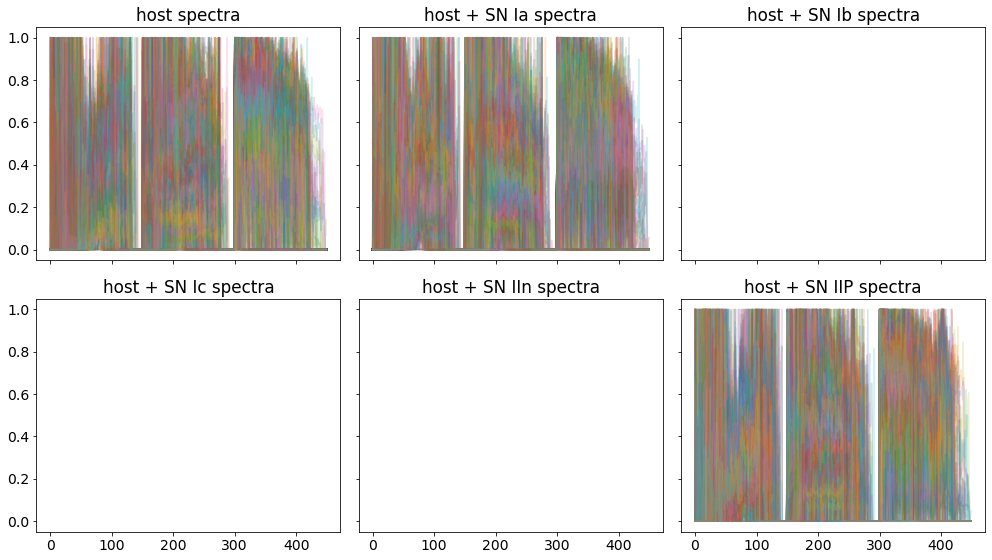

In [13]:
fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(0,500):
    
    ax = axes[0]
    ax.plot(host_flux[i], alpha=0.2)

    ax = axes[1]
    ax.plot(snia_flux[i], alpha=0.2)
    
    ax = axes[2]
#     ax.plot(snib_flux[i], alpha=0.2)
    
#     ax = axes[3]
#     ax.plot(snic_flux[i], alpha=0.2)
    
#     ax = axes[4]
#     ax.plot(sniin_flux[i], alpha=0.2)
    
    ax = axes[5]
    ax.plot(sniip_flux[i], alpha=0.2)
    
axes[0].set_title('host spectra')
axes[1].set_title('host + SN Ia spectra')
axes[2].set_title('host + SN Ib spectra')
axes[3].set_title('host + SN Ic spectra')
axes[4].set_title('host + SN IIn spectra')
axes[5].set_title('host + SN IIP spectra')

fig.tight_layout()

In [14]:
x = np.concatenate([host_flux, 
                    snia_flux,
#                     snib_flux,
#                     snic_flux,
#                     sniin_flux,
                    sniip_flux
                   ]).reshape(-1, nbins, 1)

labels = ['Host',
          'SN Ia',
#           'SN Ib',
#           'SN Ic',
#           'SN IIn',
          'SN IIP']
ntypes = len(labels)

# Convert y-label array to appropriate categorical array
from tensorflow.keras.utils import to_categorical

y = to_categorical(
        np.concatenate([np.full(nhost, 0), 
                        np.full(nsnia, 1),
#                         np.full(nsnib, 2),
#                         np.full(nsnic, 3),
#                         np.full(nsniin, 4),
                        np.full(nsniip, 2)
                       ]))

/software/python3/3.6.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/software/python3/3.6.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/software/python3/3.6.12/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/software/python3/3.6.12/lib/python3.6/site-packages/tensorflow/python/frame

In [15]:
x.shape, y.shape


((29895, 450, 1), (29895, 3))

In [16]:
import tensorflow as tf
from tensorflow.keras import utils, regularizers, callbacks, backend
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Reshape, Conv1D, MaxPooling1D, Dropout, Add, LSTM, Embedding
from tensorflow.keras.initializers import glorot_normal, glorot_uniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model


In [17]:
def network(input_shape, ncat, learning_rate=0.0005, reg=0.0032, dropout=0.7436, seed=None):
    """Define the CNN structure.
    
    Parameters
    ----------
    input_shape : int
        Shape of the input spectra.
    ncat : int
        Number of categories.
    learning_rate : float
        Learning rate.
    reg : float
        Regularization factor.
    dropout : float
        Dropout rate.
    seed : int
        Seed of initializer.
    
    Returns
    -------
    model : tensorflow.keras.Model
        A model instance of the network.
    """
    X_input = Input(input_shape, name='Input_Spec')

    # First convolutional layer.
    with backend.name_scope('Conv_1'):
        X = Conv1D(filters=8, kernel_size=5, strides=1, padding='same',
                   kernel_regularizer=regularizers.l2(reg),
                   bias_initializer='zeros',
                   kernel_initializer=glorot_normal(seed))(X_input)
        X = BatchNormalization(axis=2)(X)
        X = Activation('relu')(X)
        X = MaxPooling1D(pool_size= 2)(X)

    # Second convolutional layer.
    with backend.name_scope('Conv_2'):
        X = Conv1D(filters=16, kernel_size=5, strides=1, padding='same',
                   kernel_regularizer=regularizers.l2(reg),
                   bias_initializer='zeros',
                   kernel_initializer=glorot_normal(seed))(X)
        X = BatchNormalization(axis=2)(X)
        X = Activation('relu')(X)
        X = MaxPooling1D(2)(X)
        
    # Third convolutional layer.
    with backend.name_scope('Conv_3'):
        X = Conv1D(filters=32, kernel_size=5, strides=1, padding='same',
                   kernel_regularizer=regularizers.l2(reg),
                   bias_initializer='zeros',
                   kernel_initializer=glorot_normal(seed))(X)
        X = BatchNormalization(axis=2)(X)
        X = Activation('relu')(X)
        X = MaxPooling1D(2)(X)
        
    # Fourth convolutional layer.
    with backend.name_scope('Conv_4'):
        X = Conv1D(filters=64, kernel_size=5, strides=1, padding='same',
                   kernel_regularizer=regularizers.l2(reg),
                   bias_initializer='zeros',
                   kernel_initializer=glorot_normal(seed))(X)
        X = BatchNormalization(axis=2)(X)
        X = Activation('relu')(X)
        X = MaxPooling1D(2)(X)

    # Flatten to fully connected dense layer.
    with backend.name_scope('Dense_Layer'):
        X = Flatten()(X)
        X = Dense(256, kernel_regularizer=regularizers.l2(reg),
                  activation='relu')(X)
        X = Dropout(rate=dropout, seed=seed)(X)
    
    # Output layer with sigmoid activation.
    with backend.name_scope('Output_Layer'):
        X = Dense(ncat, kernel_regularizer=regularizers.l2(reg),
              activation='softmax',name='Output_Classes')(X)

    model = Model(inputs=X_input, outputs=X, name='SNnet')
    
    # Set up optimizer, loss function, and optimization metrics.
    model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [18]:
model = network((nbins, 1), ncat=y.shape[1])

In [19]:

from sklearn.model_selection import train_test_split

def train_test_validate(x, y, train_size=0.75, test_size=0.125, val_size=0.125):
    # Ensure proper normalization.
    if train_size + test_size + val_size != 1:
        norm = train_size + test_size + val_size
        train_size = train_size/norm
        test_size = test_size/norm
        val_size = val_size/norm
        print('Renormalized to train {:g}, test {:g}, and validate {:g}'.format(train_size, test_size, val_size))
        
    # Split into training and testing samples.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-train_size)
    
    # Split off the validation sample from the test sample.
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_size/(test_size+val_size))
    
    return x_train, x_test, x_val, y_train, y_test, y_val

In [20]:
x_train, x_test, x_val, y_train, y_test, y_val = train_test_validate(x, y, 0.6, 0.2, 0.2)

x_train.shape, x_test.shape, x_val.shape

((17937, 450, 1), (5979, 450, 1), (5979, 450, 1))

In [21]:
hist = model.fit(x_train, y_train, batch_size=65, epochs=50, validation_data=(x_test, y_test), shuffle=True)


Train on 17937 samples, validate on 5979 samples
Epoch 1/50
17937/17937 [==============================] - 30s 2ms/step - loss: nan - acc: 0.3315 - val_loss: nan - val_acc: 0.3365
Epoch 2/50
17937/17937 [==============================] - 29s 2ms/step - loss: nan - acc: 0.3315 - val_loss: nan - val_acc: 0.3365
Epoch 3/50
17937/17937 [==============================] - 29s 2ms/step - loss: nan - acc: 0.3315 - val_loss: nan - val_acc: 0.3365
Epoch 4/50
17937/17937 [==============================] - 29s 2ms/step - loss: nan - acc: 0.3315 - val_loss: nan - val_acc: 0.3365
Epoch 5/50
 3185/17937 [====>.........................] - ETA: 21s - loss: nan - acc: 0.3369

KeyboardInterrupt: 